Algoritmos


In [565]:
def swap(items, i, j):
    items[i], items[j] = items[j], items[i]


def bubbleSort(A):
    A_len = len(A)
    for i in range(A_len - 1, 0, -1):
        for j in range(0, i):
            if A[j] > A[j + 1]:
                swap(A, j, j + 1)


def bubbleSortPlus(A):
    A_len = len(A)
    for i in range(A_len - 1, 0, -1):
        swaped = False
        for j in range(0, i):
            if A[j] > A[j + 1]:
                swap(A, j, j + 1)
                swaped = True
        if not swaped:
            break

In [566]:
# A=[456, 757, 908, 645, 887, 384, 156, 667, 199, 715]
# bubbleSort(A)
# print(A)

# bubbleSortPlus(A)
# print(A)

Coleta dados


In [ ]:
import time
from numpy import random


# scope of the randomness
DOMAIN = 99_999_999_999

# defines the number of times each algorithm will be processed to find the average time
num_rounds = 100

alg_results = dict()


# calculates the executions average time
def avgTime(func, size, debug=False):
    t = 0
    for i in range(num_rounds):
        random.seed(size + i)
        # create a list with random numbers
        dataList = list(random.randint(DOMAIN, size=size))
        L = dataList.copy()
        start = time.time()
        func(L)
        end = time.time()
        t += end - start

        if debug:
            assert L == sorted(L), "Non sorted"

    return t / num_rounds


# defines the algorithms to be processed
algorithms = [bubbleSort, bubbleSortPlus]

# sizes
sizes = [i for i in range(100, 1001, 100)]

mapSizeToTime = dict()
for i in range(len(sizes)):
    print(f"Starting collect {i+1}")

    # map list size to algorithm average time
    for algorithm in algorithms:
        print("  > ", algorithm.__name__)
        mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avgTime(
            algorithm, sizes[i], True
        )
    print("")

print("Finish data collection")

Starting collect 1
  >  bubbleSort
  >  bubbleSortPlus

Starting collect 2
  >  bubbleSort
  >  bubbleSortPlus

Starting collect 3
  >  bubbleSort
  >  bubbleSortPlus

Starting collect 4
  >  bubbleSort
  >  bubbleSortPlus

Starting collect 5
  >  bubbleSort
  >  bubbleSortPlus

Starting collect 6
  >  bubbleSort
  >  bubbleSortPlus

Starting collect 7
  >  bubbleSort
  >  bubbleSortPlus

Starting collect 8
  >  bubbleSort
  >  bubbleSortPlus

Starting collect 9
  >  bubbleSort
  >  bubbleSortPlus

Starting collect 10
  >  bubbleSort
  >  bubbleSortPlus

Finish data collection


Formata dados


In [568]:
import pandas as pd

df = pd.DataFrame.from_dict(mapSizeToTime, orient="index", columns=["Time"])
df["Algorithm"] = [i.split("##")[0] for i in df.index]
df["Size"] = [int(i.split("##")[1]) for i in df.index]
df

,Time,Algorithm,Size
bubbleSort##100,0.000295,bubbleSort,100
bubbleSortPlus##100,0.000333,bubbleSortPlus,100
bubbleSort##200,0.001299,bubbleSort,200
bubbleSortPlus##200,0.001094,bubbleSortPlus,200
bubbleSort##300,0.002681,bubbleSort,300
bubbleSortPlus##300,0.002516,bubbleSortPlus,300
bubbleSort##400,0.004694,bubbleSort,400
bubbleSortPlus##400,0.004818,bubbleSortPlus,400
bubbleSort##500,0.008048,bubbleSort,500
bubbleSortPlus##500,0.008100,bubbleSortPlus,500


Gráfico


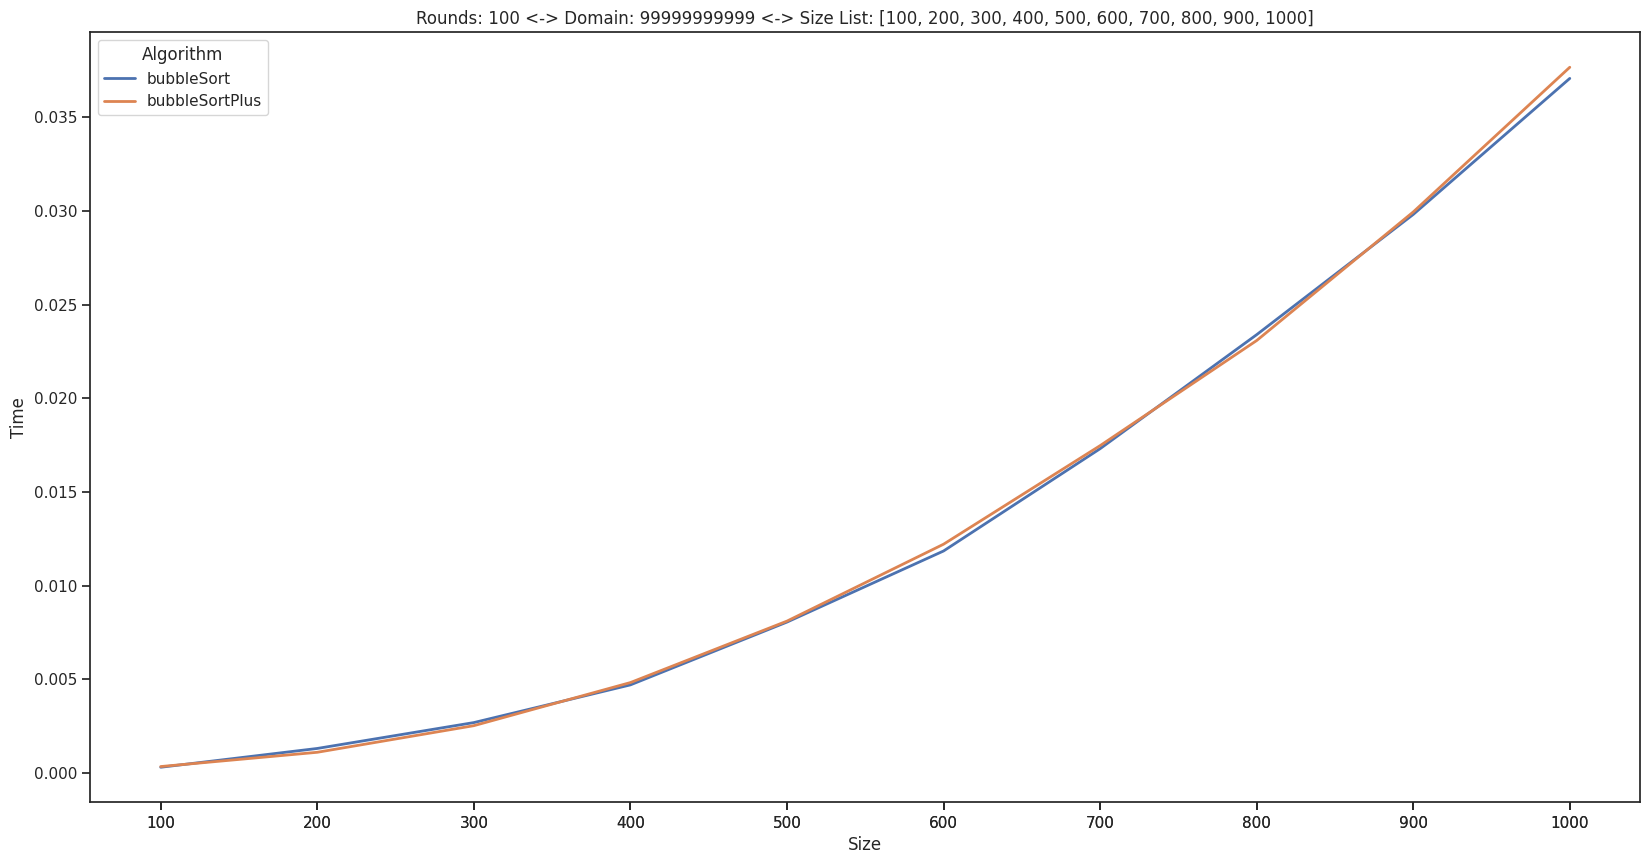

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Defines font size and line width
sns.set_theme(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

# Defines plot size
plt.rcParams["figure.figsize"] = [20, 10]

fig = plt.figure()
chart = sns.lineplot(x="Size", y="Time", hue="Algorithm", data=df)
chart.set_title(f"Rounds: {num_rounds} <-> Domain: {DOMAIN} <-> Size List: {sizes}")
# plt.yscale('log')
chart.set(xticks=[i for i in df.Size])
plt.savefig("results.png", bbox_inches="tight")